In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
%matplotlib inline

# Data Pre-Processment

### Data Exploration

In [2]:
heartAtk = pd.read_csv("./heart_attack_prediction_dataset.csv")
heartAtk.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [3]:
heartAtk.shape

(8763, 26)

In [4]:
heartAtk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
heartAtk.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### Data Preparation

We will now remove irrelevant or redundant variables for the objective in question.



In [6]:
columns_to_drop=['Patient ID','Income','Country','Continent','Hemisphere','BMI','Physical Activity Days Per Week']
heartAtk_clean_version1 = heartAtk.drop(columns_to_drop,axis=1)

In [7]:
heartAtk_clean_version1.shape

(8763, 19)

In [8]:
heartAtk_clean_version1.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Triglycerides,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,417.677051,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,223.748137,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,30.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,225.500000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,417.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,612.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,800.000000,10.000000,1.000000


We will now test for the presence of null values and eliminate them if necessary.

Nenhum valor nulo detetado.


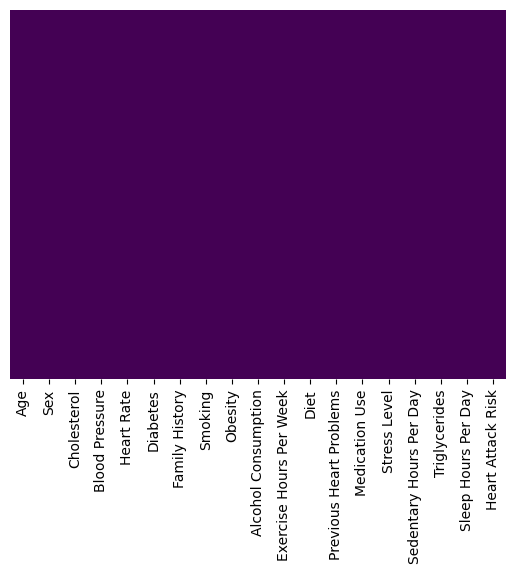

In [9]:
heartAtk_clean_version1.isna().any()
sns.heatmap(heartAtk_clean_version1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print("Nenhum valor nulo detetado.")

We will now test for the presence of duplicate values and eliminate them if necessary.

In [10]:
heartAtk_clean_version1.duplicated().sum()
heartAtk_clean_version1.drop_duplicates(inplace=True)
heartAtk_clean_version1.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Triglycerides,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,286,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,235,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,587,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,378,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,231,5,0


***Blood Pressure Values by category***
Blood pressure is an important variable in our dataset but it needs to be treated with some details in mind.

Our column that holds these values follows the specific format: Systolic Pressure/Diastolic Pressure.
These however are not very informative unless we learn how to categorize them. As such we will proceed to do that.

**Normal BP** : less than 120 Systolic Pressure and less than 80 Diastolic Pressure.

**Elevated** : 120-129 Systolic Pressure and less than 80 Diastolic Pressure.

**High Blood Pressure (Hypertension) Stage 1** : 130-139 Systolic Pressure or 80-89 Diastolic Pressure.

**High Blood Pressure (Hypertension) Stage 2** : 140 or higher Systolic Pressure or 90 or higher Diastolic Pressure.

**Hypertensive Crisis :** higher than 180 Systolic Pressure and/or higher than 120 Diastolic Pressure.



In [11]:
# Separation of Blood Pressure into Systolic Pressure and Diastolic Pressure.

def string_int_systolic(string):
    parts = string.split('/')
    return int(parts[0])

def string_int_diastolic(string):
    parts = string.split('/')
    return int(parts[1])


heartAtk_clean_version2 = pd.DataFrame(heartAtk_clean_version1)
heartAtk_clean_version2['Systolic Pressure'] = heartAtk_clean_version2['Blood Pressure'].apply(string_int_systolic)
heartAtk_clean_version2['Diastolic Pressure'] = heartAtk_clean_version2['Blood Pressure'].apply(string_int_diastolic)


However these values must also be adapted to relevant age groups.
These being : **18-39** ; **40-59**; **60+** .


In [12]:
labels = ['18-39', '40-59', '60+']
bins = [18, 39, 59, 110]

# Creating an 'Age Group' column
heartAtk_clean_version2['Age Group'] = pd.cut(heartAtk_clean_version2['Age'], bins=bins, labels=labels, right=False)

# Grouping by 'Age Group' and 'Sex'
grouped = heartAtk_clean_version2.groupby(['Age Group', 'Sex'])

age_group_1839_men = grouped.get_group(('18-39', 'Male'))
age_group_1839_women = grouped.get_group(('18-39', 'Female'))

age_group_4059_men = grouped.get_group(('40-59', 'Male'))
age_group_4059_women = grouped.get_group(('40-59', 'Female'))

age_group_60over_men = grouped.get_group(('60+', 'Male'))
age_group_60over_women = grouped.get_group(('60+', 'Female'))

age_group_1839_men.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,235,7,0,165,93,18-39
8,20,Male,145,144/105,68,1,0,1,1,0,...,0,0,5,11.348787,790,4,0,144,105,18-39
17,38,Male,166,120/74,56,1,0,1,1,0,...,0,1,9,3.660749,402,6,0,120,74,18-39
24,36,Male,133,161/90,97,1,0,1,1,1,...,1,0,10,10.963544,605,10,0,161,90,18-39
31,25,Male,197,178/72,45,0,1,1,0,1,...,1,1,1,1.419888,661,6,0,178,72,18-39


In [13]:
mean_age39_systolic_men = age_group_1839_men['Systolic Pressure'].mean()
mean_age39_diastolic_men = age_group_1839_men['Diastolic Pressure'].mean()

mean_age39_systolic_women = age_group_1839_women['Systolic Pressure'].mean()
mean_age39_diastolic_women = age_group_1839_women['Diastolic Pressure'].mean()

mean_age59_systolic_men = age_group_4059_men['Systolic Pressure'].mean()
mean_age59_diastolic_men = age_group_4059_men['Diastolic Pressure'].mean()

mean_age59_systolic_women = age_group_4059_women['Systolic Pressure'].mean()
mean_age59_diastolic_women = age_group_4059_women['Diastolic Pressure'].mean()

mean_age60over_systolic_men = age_group_60over_men['Systolic Pressure'].mean()
mean_age60over_diastolic_men = age_group_60over_men['Diastolic Pressure'].mean()

mean_age60over_systolic_women = age_group_60over_women['Systolic Pressure'].mean()
mean_age60over_diastolic_women = age_group_60over_women['Diastolic Pressure'].mean()


print("Blood pressure means on men (age group 18-39) :\n Systolic %f ; Diastolic %f" %(mean_age39_systolic_men, mean_age39_diastolic_men) )
print("Blood pressure means on women (age group 18-39) :\n Systolic %f ; Diastolic %f\n" %(mean_age39_systolic_women, mean_age39_diastolic_women) )

print("Blood pressure means on men (age group 40-59) :\n Systolic %f ; Diastolic %f" %(mean_age59_systolic_men, mean_age59_diastolic_men) )
print("Blood pressure means on women (age group 40-59) :\n Systolic %f ; Diastolic %f\n" %(mean_age59_systolic_women, mean_age59_diastolic_women) )

print("Blood pressure means on men (age group 60+) :\n Systolic %f ; Diastolic %f" %(mean_age60over_systolic_men, mean_age60over_diastolic_men) )
print("Blood pressure means on women (age group 60+) :\n Systolic %f ; Diastolic %f\n" %(mean_age60over_systolic_women, mean_age60over_diastolic_women) )

Blood pressure means on men (age group 18-39) :
 Systolic 134.558413 ; Diastolic 84.931247
Blood pressure means on women (age group 18-39) :
 Systolic 135.510740 ; Diastolic 85.658711

Blood pressure means on men (age group 40-59) :
 Systolic 134.773538 ; Diastolic 85.468308
Blood pressure means on women (age group 40-59) :
 Systolic 135.515328 ; Diastolic 85.979562

Blood pressure means on men (age group 60+) :
 Systolic 135.363367 ; Diastolic 85.067853
Blood pressure means on women (age group 60+) :
 Systolic 135.053144 ; Diastolic 84.401240



Now the columns 'Age' and 'Blood Pressure' are obsolete.

In [14]:
columns_to_drop2 = ["Age","Blood Pressure"]
heartAtk_clean_finalVersion = heartAtk_clean_version2.drop(columns_to_drop2,axis=1)

In [15]:
heartAtk_clean_finalVersion

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
0,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,286,6,0,158,88,60+
1,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,235,7,0,165,93,18-39
2,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,587,4,0,174,99,18-39
3,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,378,4,0,163,100,60+
4,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,231,5,0,91,88,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,Male,121,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,67,7,0,94,76,60+
8759,Female,120,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,617,9,0,157,102,18-39
8760,Male,250,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,527,4,1,161,75,40-59
8761,Male,178,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,114,8,0,119,67,18-39


In [16]:
heartAtk_clean_finalVersion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Sex                      8763 non-null   object  
 1   Cholesterol              8763 non-null   int64   
 2   Heart Rate               8763 non-null   int64   
 3   Diabetes                 8763 non-null   int64   
 4   Family History           8763 non-null   int64   
 5   Smoking                  8763 non-null   int64   
 6   Obesity                  8763 non-null   int64   
 7   Alcohol Consumption      8763 non-null   int64   
 8   Exercise Hours Per Week  8763 non-null   float64 
 9   Diet                     8763 non-null   object  
 10  Previous Heart Problems  8763 non-null   int64   
 11  Medication Use           8763 non-null   int64   
 12  Stress Level             8763 non-null   int64   
 13  Sedentary Hours Per Day  8763 non-null   float64 
 14  Triglyce

We shall categorize and encode some relevant columns.

**Categorizing Blood Pressure** 

In [17]:
def categorize_blood_pressure(row):
    systolic = row['Systolic Pressure']
    diastolic = row['Diastolic Pressure']
    if (systolic<120) and (diastolic<80):
        return int(0) #Normal blood pressure
    elif (120<=systolic<=129) and (diastolic<80):
        return int(1) #Elevated blood pressure
    elif (130<=systolic<=139) or (80<=diastolic<=89):
        return int(2) #High blood pressure -> Hypertension Stage 1
    elif (systolic>=140) or (diastolic>=90):
        return int(3) #High blood pressure -> Hypertension Stage 2
    else:
        return int(4) #Hypertensive Crisis

heartAtk_clean_finalVersion['Blood Pressure'] = heartAtk_clean_finalVersion.apply(categorize_blood_pressure, axis=1)
heartAtk_clean_finalVersion = heartAtk_clean_finalVersion.drop(['Systolic Pressure','Diastolic Pressure'],axis=1)

**Categorizing Cholesterol**

In [18]:
def categorize_cholesterol(row):
    chol = row['Cholesterol']
    if chol < 200:
        return int(0) #Desirable
    elif 200 <= chol <= 239:
        return int(1) #Borderline High
    else:
        return int(2) #High

heartAtk_clean_finalVersion['Cholesterol'] = heartAtk_clean_finalVersion.apply(categorize_cholesterol, axis=1)

**Categorizing Heart Rate**

In [21]:
def categorize_heartRate(row):
    hr = row['Heart Rate']
    s = row['Sex']
    a = row['Age Group']
    if (a=='18-39'):
        if(s=='Male'):
            if(hr<=70):
                return int(0) #Above Average or better
            elif(71<=hr<=74):
                return int(1) #Average
            elif(75<=hr<=81):
                return int(2) #Below Average
            else:
                return int(3) #Poor
        else:
            if(hr<=73):
                return int(0) #Above Average or better
            elif(74<=hr<=78):
                return int(1) #Average
            elif(79<=hr<=84):
                return int(2) #Below Average
            else:
                return int(3) #Poor
            
    elif (a=='40-59'):
        if(s=='Male'):
            if(hr<=71):
                return int(0) #Above Average or better
            elif(72<=hr<=76):
                return int(1) #Average
            elif(77<=hr<=83):
                return int(2) #Below Average
            else:
                return int(3) #Poor
        else:
            if(hr<=73):
                return int(0) #Above Average or better
            elif(74<=hr<=78):
                return int(1) #Average
            elif(79<=hr<=83):
                return int(2) #Below Average
            else:
                return int(3) #Poor
            
    else:
        if(s=='Male'):
            if(hr<=71):
                return int(0) #Above Average or better
            elif(72<=hr<=75):
                return int(1) #Average
            elif(76<=hr<=81):
                return int(2) #Below Average
            else:
                return int(3) #Poor
        else:
            if(hr<=73):
                return int(0) #Above Average or better
            elif(74<=hr<=77):
                return int(1) #Average
            elif(78<=hr<=84):
                return int(2) #Below Average
            else:
                return int(3) #Poor



heartAtk_clean_finalVersion['Heart Rate'] = heartAtk_clean_finalVersion.apply(categorize_heartRate, axis=1)

**Categorizing Sedentary Behaviour**

In [22]:
def categorize_sedentary(row):
    sed = row['Sedentary Hours Per Day']
    if sed > 6 :
        return int(1) #Sedentary Person
    else:
        return int(0) #Not considered sedentary
    
    
heartAtk_clean_finalVersion['Sedentary Hours Per Day'] = heartAtk_clean_finalVersion.apply(categorize_sedentary,axis=1)
heartAtk_clean_finalVersion.rename(columns={'Sedentary Hours Per Day': 'Sedentary'}, inplace=True)

**Categorizing Exercising Hours**

In [23]:
def categorize_exercise(row):
    eer = row['Exercise Hours Per Week']
    if eer > 2.5 :
        return int(1) #Enough hours of exercise per week
    else:
        return int(0) #Doesn't reach the weekly exercise quota to be considered healthy
    
    
heartAtk_clean_finalVersion['Exercise Hours Per Week'] = heartAtk_clean_finalVersion.apply(categorize_exercise,axis=1)
heartAtk_clean_finalVersion.rename(columns={'Exercise Hours Per Week': 'Enough Exercise'}, inplace=True)

**Categorizing Triglycerides**

In [24]:
def categorize_trig(row):
    eer = row['Triglycerides']
    if eer > 150 :
        return int(1) #Unhealthy levels 
    else:
        return int(0) #Healthy levels
    
heartAtk_clean_finalVersion['Triglycerides'] = heartAtk_clean_finalVersion.apply(categorize_trig,axis=1)
heartAtk_clean_finalVersion.rename(columns={'Triglycerides': 'Triglycerides Levels'}, inplace=True)

**Categorizing Sleep**

In [25]:
def categorize_sleep(row):
    sleep = row['Sleep Hours Per Day']
    if sleep >= 7.0 and sleep <= 9.0:
        return int(0) #Enough sleep
    else:
        return int(1) #Unhealthy sleeping habits
    
heartAtk_clean_finalVersion['Sleep Hours Per Day'] = heartAtk_clean_finalVersion.apply(categorize_sleep,axis=1)
heartAtk_clean_finalVersion.rename(columns={'Sleep Hours Per Day': 'Sleeping Habits'}, inplace=True)

**Encoding Sex, Age and Diet**

In [26]:
heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Sex'], prefix='Sex')
heartAtk_clean_finalVersion['Sex_Female']= heartAtk_clean_finalVersion['Sex_Female'].astype(int)
heartAtk_clean_finalVersion['Sex_Male']= heartAtk_clean_finalVersion['Sex_Male'].astype(int)

heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Diet'], prefix='Diet')
heartAtk_clean_finalVersion['Diet_Unhealthy']= heartAtk_clean_finalVersion['Diet_Unhealthy'].astype(int)
heartAtk_clean_finalVersion['Diet_Average']= heartAtk_clean_finalVersion['Diet_Average'].astype(int)
heartAtk_clean_finalVersion['Diet_Healthy']= heartAtk_clean_finalVersion['Diet_Healthy'].astype(int)

heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Age Group'], prefix='AgeGroup')
heartAtk_clean_finalVersion['AgeGroup_18-39'] = heartAtk_clean_finalVersion['AgeGroup_18-39'].astype(int)
heartAtk_clean_finalVersion['AgeGroup_40-59'] = heartAtk_clean_finalVersion['AgeGroup_40-59'].astype(int)
heartAtk_clean_finalVersion['AgeGroup_60+'] = heartAtk_clean_finalVersion['AgeGroup_60+'].astype(int)

In [27]:
heartAtk_clean_finalVersion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Cholesterol              8763 non-null   int64
 1   Heart Rate               8763 non-null   int64
 2   Diabetes                 8763 non-null   int64
 3   Family History           8763 non-null   int64
 4   Smoking                  8763 non-null   int64
 5   Obesity                  8763 non-null   int64
 6   Alcohol Consumption      8763 non-null   int64
 7   Enough Exercise          8763 non-null   int64
 8   Previous Heart Problems  8763 non-null   int64
 9   Medication Use           8763 non-null   int64
 10  Stress Level             8763 non-null   int64
 11  Sedentary                8763 non-null   int64
 12  Triglycerides Levels     8763 non-null   int64
 13  Sleeping Habits          8763 non-null   int64
 14  Heart Attack Risk        8763 non-null   int64
 15  Bloo

In [28]:
heartAtk_clean_finalVersion

,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Enough Exercise,Previous Heart Problems,Medication Use,...,Heart Attack Risk,Blood Pressure,Sex_Female,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy,AgeGroup_18-39,AgeGroup_40-59,AgeGroup_60+
0,1,0,0,0,1,0,0,1,0,0,...,0,2,0,1,1,0,0,0,0,1
1,2,0,1,1,1,1,1,0,1,0,...,0,3,0,1,0,0,1,1,0,0
2,2,0,1,0,0,0,0,0,1,1,...,0,3,1,0,0,1,0,1,0,0
3,2,0,1,1,1,0,1,1,1,0,...,0,3,0,1,1,0,0,0,0,1
4,2,0,1,1,1,1,0,1,1,0,...,0,2,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0,0,1,1,1,0,1,1,1,1,...,0,0,0,1,0,1,0,0,0,1
8759,0,0,1,0,0,1,0,1,0,0,...,0,3,1,0,0,1,0,1,0,0
8760,2,0,0,1,1,1,1,1,1,0,...,1,3,0,1,1,0,0,0,1,0
8761,0,0,1,0,1,0,0,1,1,1,...,0,0,0,1,0,0,1,1,0,0


**Multivariate Analysis**

<Axes: >

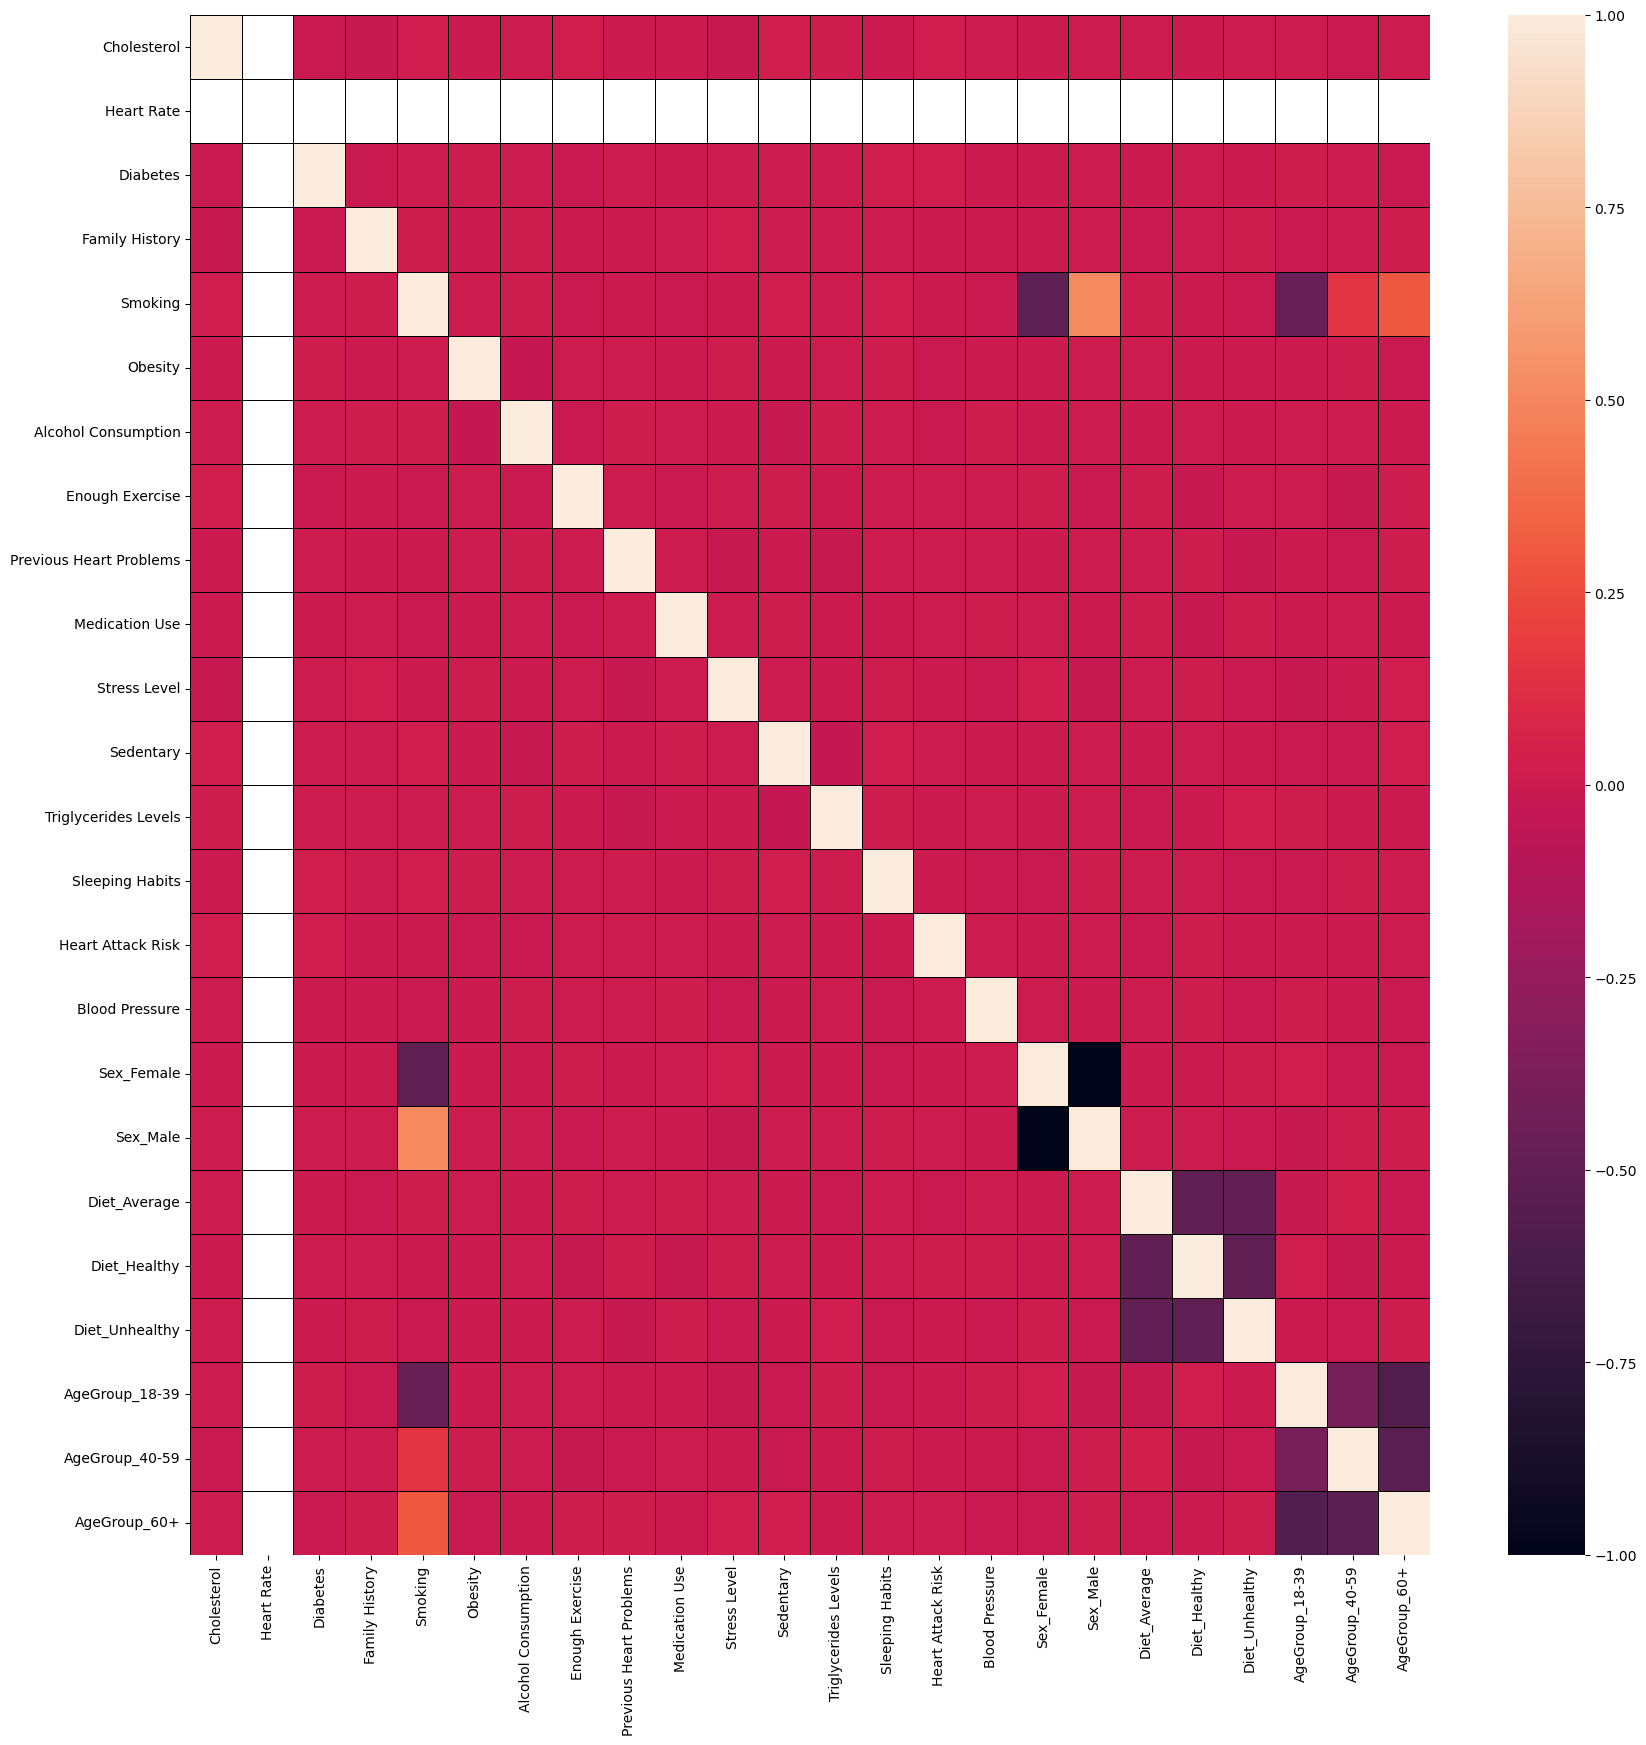

In [29]:
# Correlation between variables (This might need fixing due to the large dataset: Possible Solution, make it only for a subset of dataset)

fig = plt.figure(figsize=(20,20))
correlation_matrix = heartAtk_clean_finalVersion.corr(method="pearson")
sns.heatmap(correlation_matrix, linecolor='black', linewidths=0.5)

**Date Pre-processing complete.**

# Data Analysis

**Decision Tree Classifier Method**

In [30]:
x = heartAtk_clean_finalVersion.drop(['Heart Attack Risk'],axis=1) # Input Data
y = heartAtk_clean_finalVersion['Heart Attack Risk'].to_frame() # Target Feature

# Creating testing data and training data.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=2021)

print("The shape of x is %s. The training set has the shape %s and the test set has the shape %s." %(x.shape, x_train.shape, x_test.shape))
print("The shape of y is %s. The training set has the shape %s and the test set has the shape %s." %(y.shape, y_train.shape, y_test.shape))

The shape of x is (8763, 23). The training set has the shape (5695, 23) and the test set has the shape (3068, 23).
The shape of y is (8763, 1). The training set has the shape (5695, 1) and the test set has the shape (3068, 1).


**Hold-Out Validation**

In [53]:
#Instance of the Decision Tree
classifier = DecisionTreeClassifier(random_state=2021)

#Begin training
classifier.fit(x_train, y_train)

# Predictions for the function
predictions = classifier.predict(x_test)

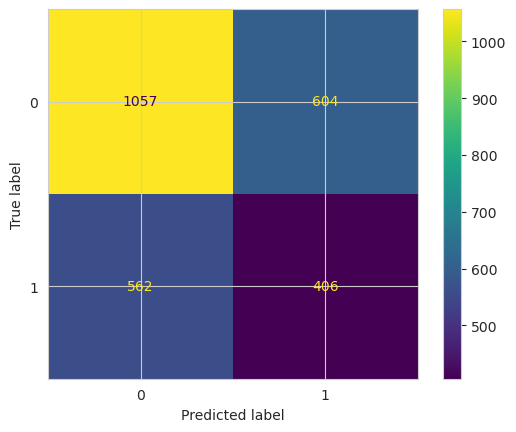

In [54]:
# And now for the Quality Metrics

# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [55]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score: %s" %accuracy)
precision = precision_score(y_test, predictions)
print("Precision Score: %s" %precision)
recall = recall_score(y_test, predictions)
print("Recall Score: %s" %recall)

Accuracy Score: 0.5564853556485355
Precision Score: 0.401980198019802
Recall Score: 0.4194214876033058


ROC and AUC Score: 0.5278925619834711


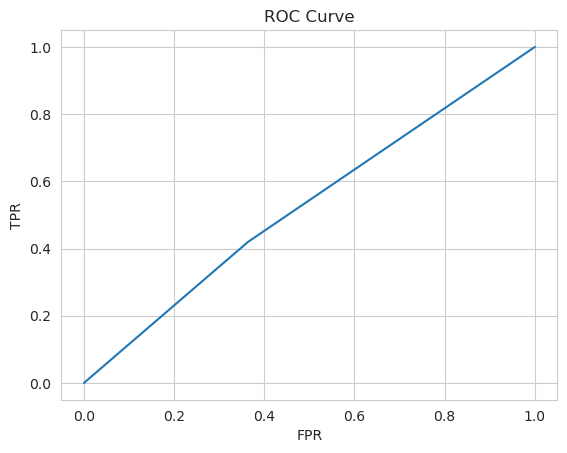

In [56]:
roc_auc = roc_auc_score(y_test,predictions)
print("ROC and AUC Score: %s" %roc_auc)

fpr, tpr, _ = roc_curve(y_test, predictions)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [57]:
f1 = f1_score(y_test, predictions)
fbeta = fbeta_score(y_test, predictions, beta=0.5)

print("F1 Score: %s" %f1)
print("FBeta Score: %s" %fbeta)

F1 Score: 0.41051567239635994
FBeta Score: 0.4053514376996806


**10-Fold Cross Validation**

In [59]:
# And now for the Module Validation

classifier2 = DecisionTreeClassifier(criterion = "gini", max_depth=10, random_state=2021)
scores = cross_val_score(classifier2,x,y,cv = 10)
print(scores)
print("Accuracy of %0.2f with a standard deviation of %0.2f" %(scores.mean(), scores.std()))

[0.55302166 0.56442417 0.5963512  0.56278539 0.60844749 0.56164384
 0.57191781 0.58333333 0.57191781 0.5673516 ]
Accuracy of 0.57 with a standard deviation of 0.02


**GridSearchCV**

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

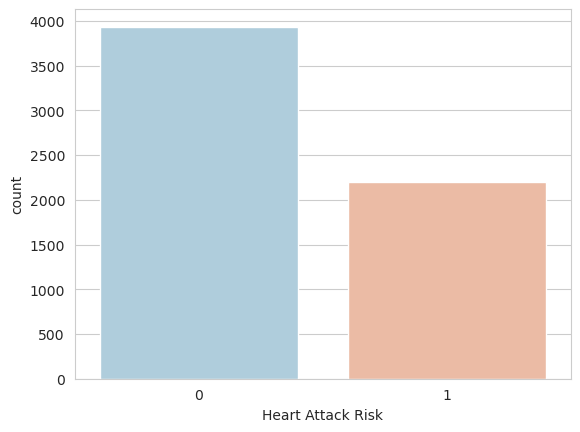

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,np.ravel(y),test_size=0.30,random_state=2021)

sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_train,columns=['Heart Attack Risk']), palette='RdBu_r')

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

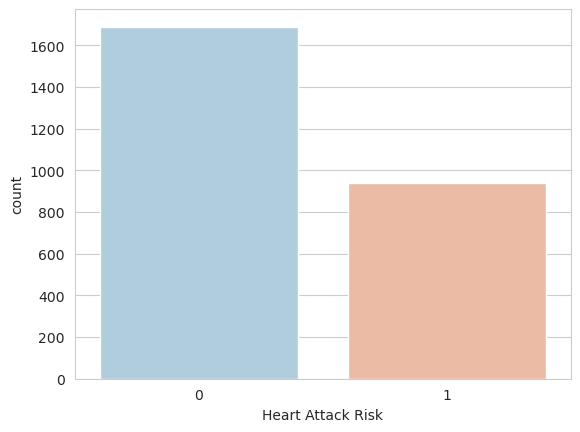

In [39]:
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_test,columns=['Heart Attack Risk']),palette='RdBu_r')

**10-Fold Cross Validation**

In [40]:
cross_valid_modelo = SVC(random_state=2021)
scores = cross_val_score(cross_valid_modelo,x, np.ravel(y),cv=10)
scores

array([0.64196123, 0.64196123, 0.64196123, 0.64269406, 0.64155251,
       0.64155251, 0.64155251, 0.64155251, 0.64155251, 0.64155251])

In [41]:
print("%0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(),scores.std()))

0.64 accuracy with a standard deviation of 0.0004


In [42]:
model = SVC(random_state=2021)
model.fit(x_train,y_train)

SVC(random_state=2021)

In [43]:
predictions = model.predict(x_test)
print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))

0.64 accuracy


In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1689
           1       0.36      0.39      0.37       940

    accuracy                           0.53      2629
   macro avg       0.50      0.50      0.50      2629
weighted avg       0.54      0.53      0.54      2629



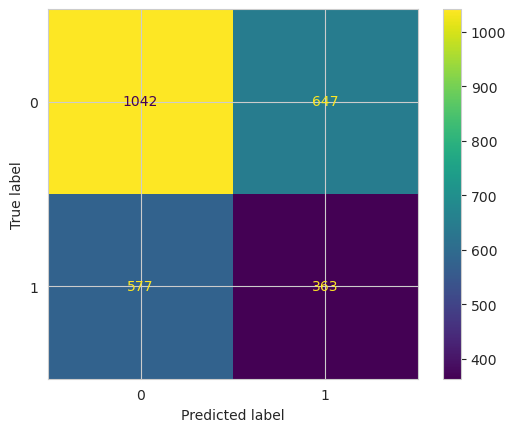

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test,predictions)
plt.show()

In [63]:
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

grid = GridSearchCV(SVC(random_state=2021),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   1.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   1.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   1.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   1.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   1.7s


KeyboardInterrupt: 

In [230]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [231]:
grid.best_estimator_

SVC(C=0.1, gamma=1, random_state=2021)

In [232]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1689
           1       0.00      0.00      0.00       940

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629



c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


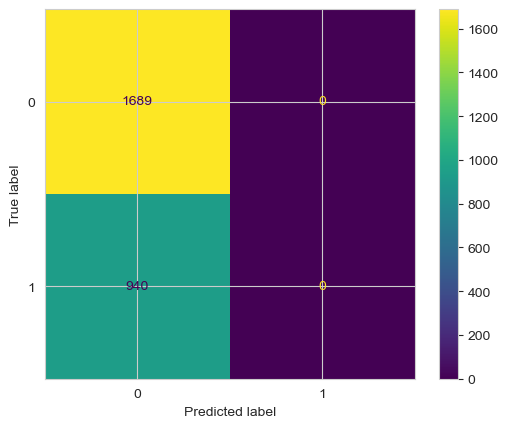

In [233]:
ConfusionMatrixDisplay.from_predictions(y_test,grid_predictions)
plt.show()

**Logistic Regression Method**

In [46]:
x = heartAtk_clean_finalVersion.drop('Heart Attack Risk',axis=1)
y = heartAtk_clean_finalVersion['Heart Attack Risk']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=101)

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

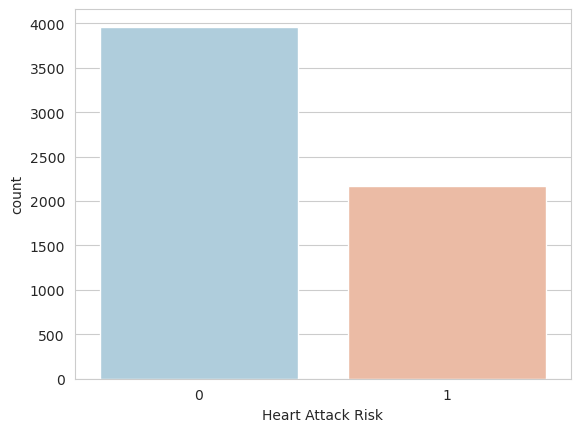

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_train,columns=['Heart Attack Risk']),palette='RdBu_r')

<Axes: xlabel='Heart Attack Risk', ylabel='count'>

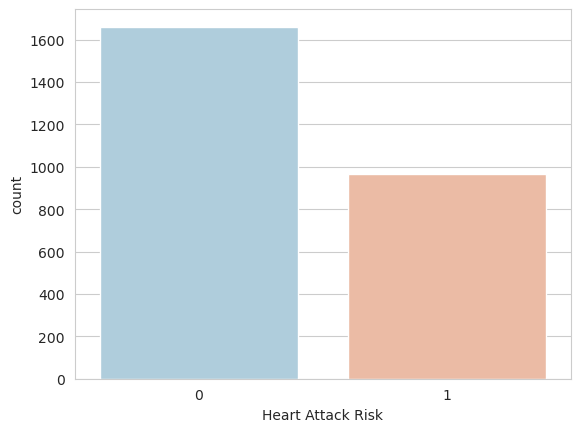

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_test,columns=['Heart Attack Risk']),palette='RdBu_r')

In [49]:
starttime = time.process_time()

logisticModel1 = LogisticRegression(random_state=2022, solver='newton-cg')
print(logisticModel1)
logisticModel1.fit(x_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

predictionsLogisticModel1 = logisticModel1.predict(x_test)

LogisticRegression(random_state=2022, solver='newton-cg')
Time spent: 0.2232964060000029 seconds


In [50]:
starttime = time.process_time()

logisticModel2 = LogisticRegression(random_state=2022, solver='liblinear')
print(logisticModel1)
logisticModel2.fit(x_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

predictionsLogisticModel2 = logisticModel2.predict(x_test)

LogisticRegression(random_state=2022, solver='newton-cg')
Time spent: 0.02460262900000032 seconds


In [51]:
print("With solver 'newton-cgs' : \n",classification_report(y_test,predictionsLogisticModel1,zero_division=1))
print("With solver 'liblinear' : \n",classification_report(y_test,predictionsLogisticModel2,zero_division=1))

With solver 'newton-cgs' : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       1.00      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.82      0.50      0.39      2629
weighted avg       0.77      0.63      0.49      2629

With solver 'liblinear' : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       1.00      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.82      0.50      0.39      2629
weighted avg       0.77      0.63      0.49      2629



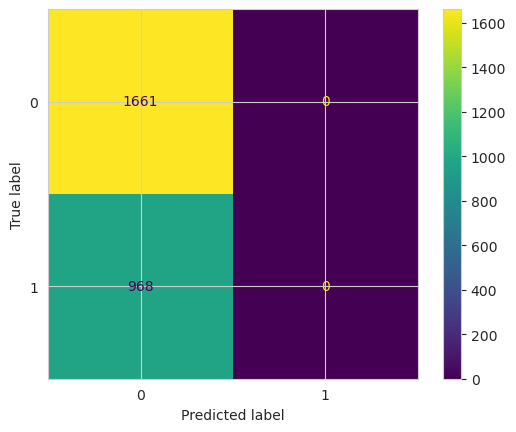

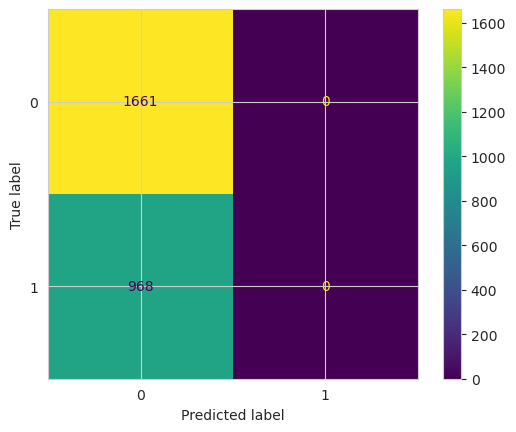

In [52]:
# These confusion matrixes are...confusing. I don't understand how this is happening. We will need to look into it.

ConfusionMatrixDisplay.from_predictions(y_test,predictionsLogisticModel1)
ConfusionMatrixDisplay.from_predictions(y_test,predictionsLogisticModel2)
plt.show()

**Unsupervised Learning (K-Means Method)**

In [67]:
kmeans = KMeans(n_clusters=4,n_init=10,random_state=2022)

In [68]:
kmeans.fit(heartAtk_clean_finalVersion)

KMeans(n_clusters=4, n_init=10, random_state=2022)

In [69]:
kmeans.cluster_centers_

array([[1.25984572, 0.        , 0.65570443, 0.50182704, 0.8952497 ,
        0.50426309, 0.60738936, 0.87088916, 0.48761673, 0.50872919,
        9.02842063, 0.49857897, 0.84368656, 0.57409663, 0.34876167,
        2.34307755, 0.318311  , 0.681689  , 0.33576939, 0.34591961,
        0.318311  , 0.28948437, 0.26228177, 0.44823386],
       [1.30498866, 0.        , 0.65079365, 0.49130763, 0.89606954,
        0.49357521, 0.60355253, 0.86961451, 0.50566893, 0.50680272,
        2.00113379, 0.49622071, 0.84769463, 0.56046863, 0.3590325 ,
        2.25547997, 0.29478458, 0.70521542, 0.34051398, 0.3276644 ,
        0.33182162, 0.31254724, 0.26417234, 0.42328042],
       [1.34350282, 0.        , 0.64745763, 0.4740113 , 0.89265537,
        0.4960452 , 0.59774011, 0.88079096, 0.50338983, 0.47514124,
        4.48587571, 0.47966102, 0.84689266, 0.57514124, 0.3559322 ,
        2.25988701, 0.30338983, 0.69661017, 0.30282486, 0.34519774,
        0.3519774 , 0.29717514, 0.27683616, 0.4259887 ],
       [1.290

In [70]:
kmeans.labels_

array([0, 1, 0, ..., 2, 2, 0], dtype=int32)

In [71]:
pred = kmeans.predict(heartAtk_clean_finalVersion)

In [73]:
pred

array([0, 1, 0, ..., 2, 2, 0], dtype=int32)